# Author: Mayur Rajendrakumar Ghate
## Task - 1: Prediction using Supervised ML
## *Problem Statement: Predict the percentage of marks the student is expected to score based on the no. of study hours.*
## The Sparks Foundation
### Graduate Rotational Internship Program (GRIP) June 2021 Batch
### Data Science & Business Analytics Tasks

## Importing the required libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Importing dataset

In [2]:
# Here i am importing data from url link 
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head() # head displayed first 5 rows of data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# To check the size of data in terms of Row X Columns
df.shape 

(25, 2)

In [4]:
# To check for NaN or Null values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# To check the info about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# To check Mean, Median, Standard Deviation, Min., Max. about the columns in data set
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# To check corelation between columns in data set
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data Visualization

**Let observe the distribution of data using 2-D graph**

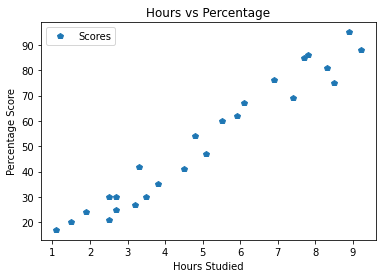

In [8]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='p')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the above graph, a positive linear relation between the 'number of hours studied' and 'percentage of score' is observed. Here, positive relation means when Study hours increases the percentage score also increases.**

## Data Pre-Processing

**This step involves dividing data to features(X) & labels(y)**

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

**Now Spliting data into Train data & Test data**

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Here, the Trained data size is 80% & that of Test data size 20% of the overall data set

## Model Training

**Model is traind on a Linear Regression model.**

In [11]:
# Importing linear regression model & training the model on train dataset
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## Model Testing

**Trained model is now tested on the 20% test dataset**

In [12]:
# initialize the test result 
y_pred = reg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Comparing actual & predicted results**

In [13]:
# Comparing results & converting array into data frame
df2 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#Estimating training and test score
print("Training Score:",reg.score(X_train,y_train))
print("Test Score:",reg.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


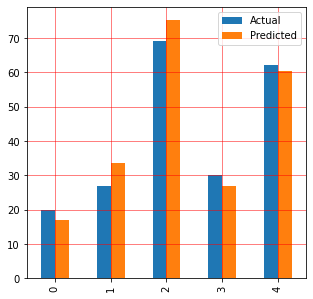

In [15]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
df2.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

**The above graph shows the difference bet Actual & Predicted values**

## Plotting the regression line

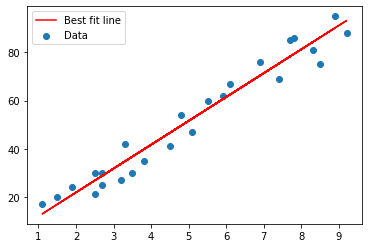

In [16]:
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y,label='Data')
plt.plot(X, line,label='Best fit line',color='r');
plt.legend()

**Accuracy & MAE of test dataset**

In [17]:
print('Accuracy:',reg.score(X_test,y_test))
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Accuracy: 0.9454906892105356
MAE: 4.183859899002975


## Making Predictions

In [18]:
# You can also test with your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model

**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well algorithm perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy. Evaluation done using different matrices like Mean Absolute Error, Mean Squared Error, Root Mean Squared Error & r2**

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
r2: 0.9454906892105356


### Conclusion of Task: From Linear Regression model, if a student study for 9.25 hours then student got 93.69% marks.

# Thank You.